<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Для начала изучим данные и проведем предобработку:
- Определии и изучии пропущенные значения
- Найдем причины, которые могли привести к пропускам в данных.
- Приведем данные к нужным типам

Добавим в таблицу небходимые данные для дальнейшего анализа:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Проведем исследовательский анализ данных и выполните следующие шаги:

- Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра.
- Изучим время продажи квартиры. Построем гистограмму. Посчитаем среднее и медиану.
- Уберим редкие и выбивающиеся значения. 
- Изучим какие факторы больше всего влияют на стоимость квартиры
- Изучим зависит ли цена от площади, числа комнат, удалённости от центра. 
- Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

- Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 
- Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделм квартиры в Санкт-Петербурге (locality_name), чтобы выяснить, какая область входит в центр.
- Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления) и сравним их с общими выводами по всей выборке

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [2]:
#изучим типы данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
#изучаем таблицу данных
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

- first_day_exposition - не тот тип(object), должен быть тип datetime
- ceiling_height - нулевые значения
- floors_total - нулевые значения
- is_apartment - нулевые значения
- living_area - нулевые значения
- kitchen_area - нулевые значения
- balcony - нулевые значения, не тот тип
- locality_name - нулевые значения
- airports_nearest - нулевые значения
- cityCenters_nearest - нулевые значения
- parks_nearest - нулевые значения
- ponds_nearest - нулевые значения
- days_exposition - не тот тип, должен быть int, нулевые значения

## Предобработка данных

In [4]:
#посмотрим значения в столбцах для выявления нестандартных значений на первый взгляд и ошибок
df['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [5]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [6]:
df['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [7]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [8]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [9]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [10]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [11]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [12]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [13]:
#все что выше осталяем без изменений, так как данные в целом удобный для восприятия и анализа
df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')
#переведем столбец с датой в формат даты без времени, ибо более подробное время не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

#заменим пропуски в balcony на 0 и изменим тип данных на int, если человек не указал число балконов — скорее всего, их нет.
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

#изменим цену на тип int для удобства анализа
df['last_price'] = df['last_price'].astype('int')


#столбец апартаменты видимо появился не начала ведения базы, все пропущенные значения заменим на False
df['is_apartment'] = df['is_apartment'].fillna(False)

## Расчёты и добавление результатов в таблицу

**Посчитаем и добавим в таблицу**
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [14]:
#создадим функцию категоризации по этажам
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи 
df['floor_cat'] = df.apply(floor_cat, axis = 1)

In [15]:
#столбец дня недели
df['weekday'] = df['first_day_exposition'].dt.weekday
#столбец месяца
df['month'] = df['first_day_exposition'].dt.month

#столбец года
df['year'] = df['first_day_exposition'].dt.year

In [16]:
#посчитаем цену квадратного метра
df['price_per_m'] = df['last_price'] / df['total_area']

In [17]:
#отношение жилой площади к общей
df['living_ratio'] = df['living_area'] / df['total_area']

In [18]:
#отношение площади кухни к общей
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area']

In [19]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,floor_cat,weekday,month,year,price_per_m,living_ratio,kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,0,другой,3,3,2019,120370.370370,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81,первый,1,12,2018,82920.792079,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,2.0,574.0,558,другой,3,8,2015,92785.714286,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424,другой,4,7,2015,408176.100629,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121,другой,1,6,2018,100000.000000,0.320000,0.410000


## Исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

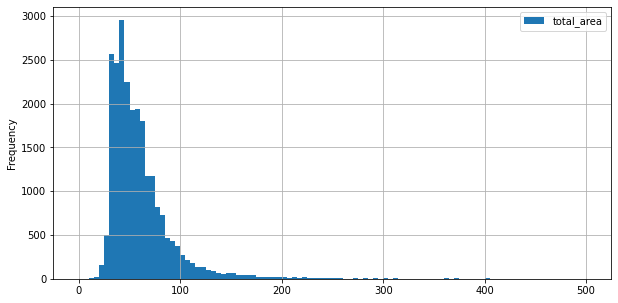

In [20]:
#начнем с общей площади
# в целом распределение данных нормальное, при этом явно видно, что в данных есть большой правый хвост. 
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,500))
df['total_area'].describe()

**Изучаем следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра.**

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

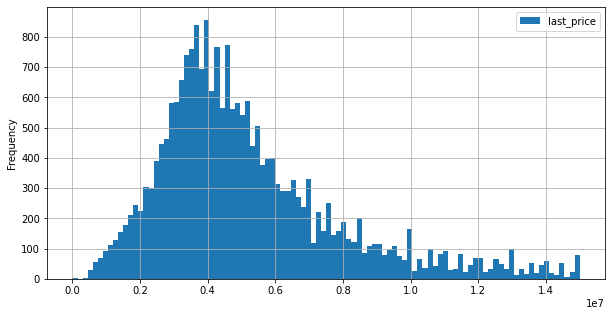

In [21]:
#изучим цену
#с данными на первый взгляд все нормально, никаких явных выбросов нет.
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (10,5))
df['last_price'] = df['last_price']/ 1000000
df['last_price'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

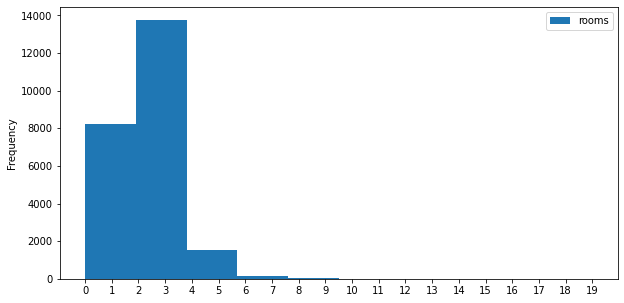

In [22]:
#число комнат, построим немного иным способом для более наглядной картины
#с данными так же все нормально
df.plot(y = 'rooms', kind = 'hist', figsize = (10,5))
plt.xticks(range(20))
df['rooms'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

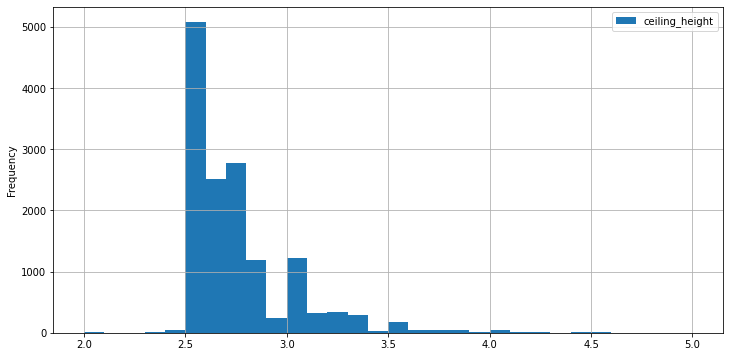

In [23]:
#высота потолков
#в общем с данными все нормально, но имеется некий выброс в начале, а так же хвост справа
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (12,6))
df['ceiling_height'].describe()

**Выводы:**

- по площади есть и 12 кв.м., и 900 кв.м., среднее значение 60 и оно кажется самым адекватным
- число комнат: от 0 до 19. Возможно, это общежития, студии или нежилые помещения
- высота потолков: от 1 до 100 метров.

**Изучим время продажи квартиры. Построем гистограмму. Посчитаем среднее и медиану и выясним когда можно считать, что продажи прошли очень быстро, а когда необычно долго**

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

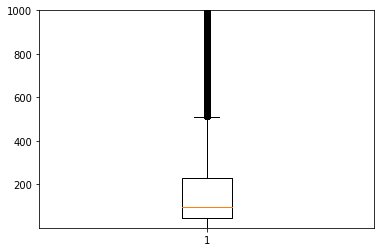

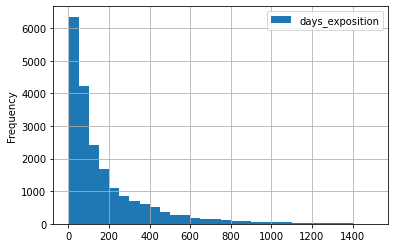

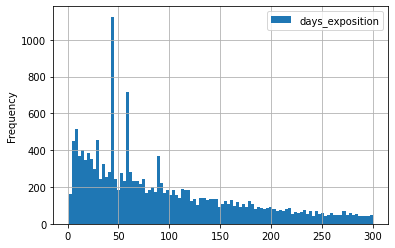

In [24]:
#построим диаграмму размаха
plt.boxplot(df[df['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1500))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))
#среднее значение, медиана и межквартильный размах
df[df['days_exposition']!=0]['days_exposition'].describe()

In [25]:
df[df['days_exposition']!=0]['days_exposition'].value_counts()

45      880
60      538
7       234
30      208
90      204
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1141, dtype: int64

**Вывод:**
Среднее значение - 180 дней, медиана - 95 дней. Построив гистограммы видим, что  у нас имеются необычные значения 45, 60, 7, 30, 90 дней это самое распространненое количество дней до того как снять объявления.
Возможно, есть определенные правила площадки, например на авито после истечения срока необходимо вручную продлять или обьявление снимается с публикации. Это касается 45, 60, 30 и 90 дней.
На счет 7 дней, руководствуясь здравым рассудком, мы можем предположить, что за 7 дней продать квартиру нереально.
Исходя из вывода выше, могу предположить что обьявления с этими сроками размещения можно удалить из нашей выборки.
Так же по гистограммам и сравнением с межквартальным размахом можем сделать вывод что среднее время продажи будем считать до 600 дней.

**Убираем редкие и выбивающиеся значения.**

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

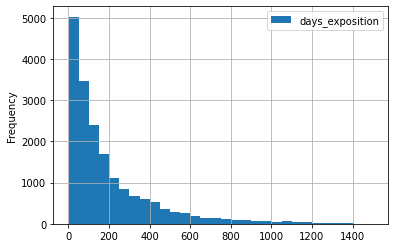

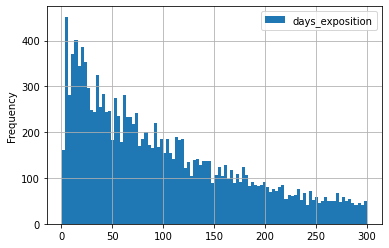

In [26]:
#Уберем данные от необычных значений о которых мы говорили выше.
new_df = df.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 7 and days_exposition != 0')

#гистограммы
new_df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1500))
new_df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,300))

#среднее значение, медиана и межквартильный размах
new_df['days_exposition'].describe()

In [27]:
new_df['days_exposition'].value_counts()

4       176
3       158
5       152
14      148
9       143
       ... 
1112      1
1080      1
1064      1
1032      1
1391      1
Name: days_exposition, Length: 1136, dtype: int64

**Вывод:**
После того как убрали необычные значения график стал более ровным и в новых данных получили значения медианы и среднего значения чуть больше, чем в исходных.

Изучим какие факторы больше всего влияют на стоимость квартиры, зависит ли цена от площади, числа комнат, удалённости от центра, зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, а также изучите зависимость от даты размещения: дня недели, месяца и года.

0.6536750579657246

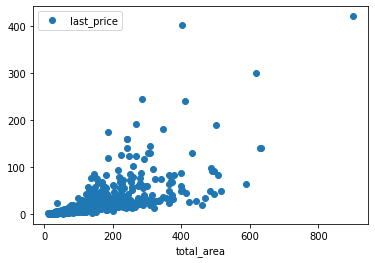

In [28]:
#Сделаем сводную таблицу по цене от всей площади квартиры и построим график, а так же получим корреляцию Пирсона
pivot_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.plot(y = 'median', style = 'o')
df['total_area'].corr(df['last_price'])

**Вывод:**

Видим что, что с ростом площади понемногу растет и стоимость, что в целом нормально, зависимость достаточно слабая - согласно корреляции Пирсона - 0.6 

0.3633428499648953

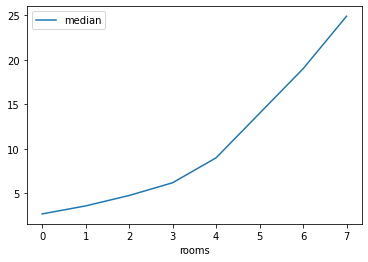

In [29]:
#Сделаем сводную таблицу цены от числа комнат и построим график.
pivot_table_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')
df['rooms'].corr(df['last_price'])

**Вывод:**
С ростом комнат происходит и рост цены, корреляция еще меньше)

-0.20674734874298373

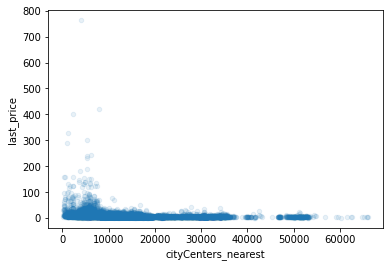

In [30]:
#Сделаем график цены от удалённости от центра
df.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.1)
df['cityCenters_nearest'].corr(df['last_price'])

**Вывод:** Все как должно быть, чем ближе к центру, тем выше стоимость, корреляция это подтверждает.

<AxesSubplot:xlabel='floor_cat'>

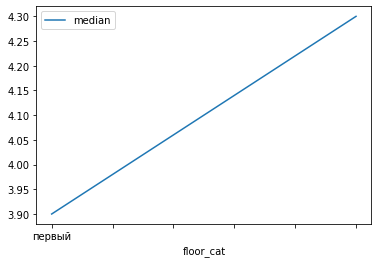

In [31]:
#Сделаем сводную таблицу цены от этажа и построим график.
pivot_floor_cat = df.query('floor_cat != "другой"').pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_floor_cat.columns = ['mean', 'count', 'median']
pivot_floor_cat.plot(y = 'median')

**Вывод:** Как известно самые дешевые квартиры на первом этаже, что мы и видим из графика

<AxesSubplot:xlabel='year'>

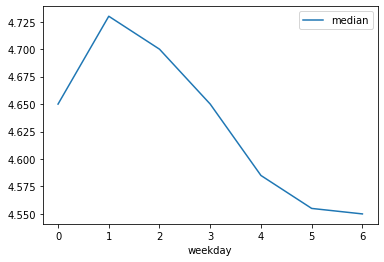

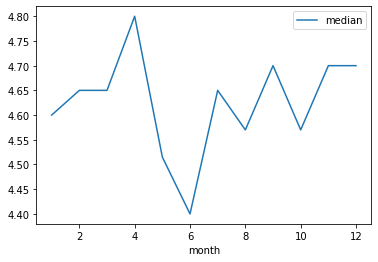

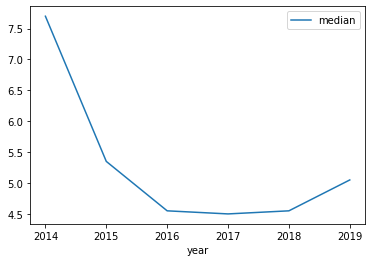

In [32]:
#Сделаем сводную таблицу цены от даты размещения(день недели)
pivot_weekday = df.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_weekday.columns = ['mean', 'count', 'median']
pivot_weekday.plot(y = 'median')

#Сделаем сводную таблицу цены от даты размещения(месяц)
pivot_month = df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_month.columns = ['mean', 'count', 'median']
pivot_month.plot(y = 'median')

#Сделаем сводную таблицу цены от даты размещения(год)
pivot_year = df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_year.columns = ['mean', 'count', 'median']
pivot_year.plot(y = 'median')

In [33]:
pivot_month.sort_values('median', ascending = False)

,mean,count,median
month,,,
4,6.737198,2379,4.800
9,6.825470,1981,4.700
11,6.461363,2371,4.700
12,7.011731,1641,4.700
2,6.468500,2640,4.650
3,6.359275,2587,4.650
7,6.649337,1695,4.650
1,6.668233,1500,4.600
8,6.350233,1744,4.570


**Вывод:**
- чем ближе ко вторнику тем выше стоимость, по субботам стоимость самая низкая
- самая высокая стоимость метра в апреле и августе, а низкая в мае и июне. Могу предположить, что это сезонность.
- с 2014 до 2016 года цена падала, но далее снова пошла на вверх.

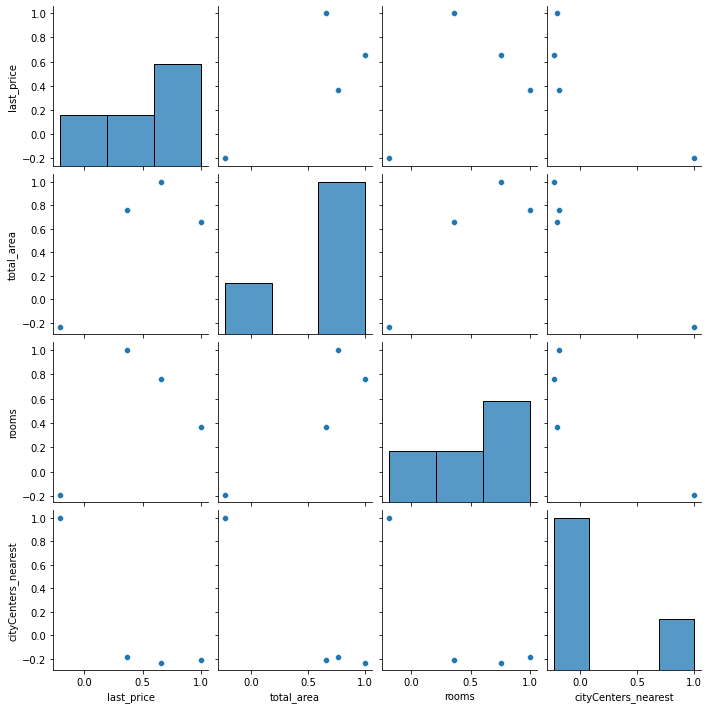

In [34]:
#Посмотрим корреляцию Пирсона по данным параметрам.
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())

**Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.**

In [35]:
#Сделаем сводную таблицу и отсортируем их.
locality_table = df.pivot_table(index = 'locality_name', values = 'last_price', aggfunc=['count', 'mean'])
locality_table.columns = ['count', 'mean']
locality_table = locality_table.sort_values('count', ascending = False).head(10)
locality_table

,count,mean
locality_name,,
Санкт-Петербург,15721,8.062507
посёлок Мурино,522,3.672049
посёлок Шушары,440,4.108082
Всеволожск,398,3.789068
Пушкин,369,6.469036
Колпино,338,3.964021
посёлок Парголово,327,4.488075
Гатчина,307,3.488337
деревня Кудрово,299,4.234158


<AxesSubplot:xlabel='locality_name'>

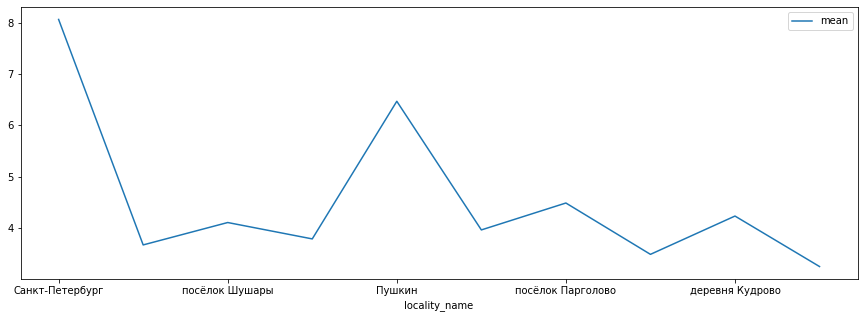

In [36]:
locality_table.plot(y = 'mean', figsize=(15,5))

In [37]:
#максимальная стоимость
locality_table[locality_table['mean']==locality_table['mean'].max()]
#минимальная стоимость
locality_table[locality_table['mean']==locality_table['mean'].min()]

,count,mean
locality_name,,
Выборг,237,3.250983


**Вывод:** 

Самая высокая стоимость: Питер

Самая низкая стоимость: Выборг

**Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Выясним, какая область входит в центр.  Построем график: он должен показывать, как цена зависит от удалённости от центра.**

,last_price
distance_to_center,
0,23.442315
1,18.850852
2,16.163314
3,13.436831
4,13.632025
5,15.306121
6,14.389106
7,12.797674
8,8.445272


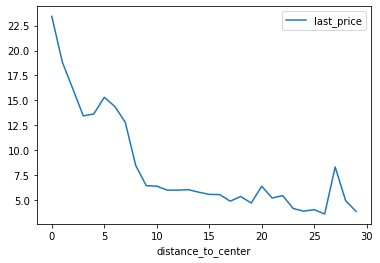

In [38]:
#Создаем новый столбец и делим данные на 1000, чтобы были км, а не м.
#Так же заменим пропуски и приведем все к типу int, без этого с данными крайне не удобно работать.
df['distance_to_center'] = df['cityCenters_nearest']/1000
df['distance_to_center']= df['distance_to_center'].fillna(999999)
df['distance_to_center'] = df['distance_to_center'].astype('int')
distance_to_center = df.query('locality_name == "Санкт-Петербург" and distance_to_center !=999999').pivot_table(index = 'distance_to_center', values = 'last_price', aggfunc = 'mean')
distance_to_center.plot()
distance_to_center

**Вывод**

Я бы взял радиус в 10 км от центра, есть небольшой всплески и дальше, но возможно это какие то элитные районы.

**Выделим сегмент квартир в центре. 
Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).**

0.3634802991255781

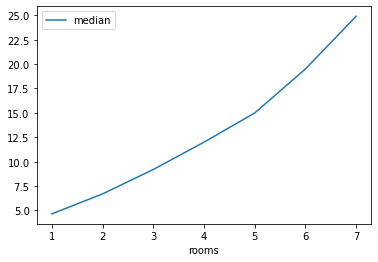

In [39]:
#выделим квартиры в центре, беря за радиус 10 км
spb_centr = df.query('distance_to_center <= 10 and locality_name == "Санкт-Петербург"')

#Сводная таблица и график по стоимости квадратного метра от количества комнат
spb_centr_rooms = spb_centr.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_centr_rooms.columns = ['mean', 'count', 'median']
spb_centr_rooms.query('count > 50').plot(y = 'median')

spb_centr['rooms'].corr(spb_centr['last_price'])

In [40]:
spb_centr['last_price'].describe()

count    5984.000000
mean       11.795395
std        20.049281
min         0.012190
25%         5.200000
50%         7.550000
75%        12.000000
max       763.000000
Name: last_price, dtype: float64

**Вывод:**
в центре чем меньше количество комнат, тем дороже стоимость одного квадратного метра, корреляция и общий вывод соотвестует общей выборке

-0.18715026399048107

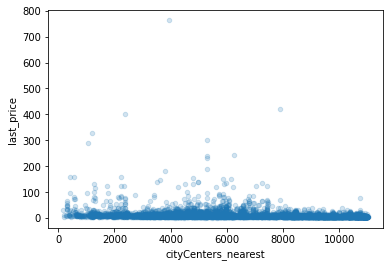

In [41]:
#Cоставим сводную таблицу и график по стоимости квадратного метра от удаленности от центра.
spb_centr.plot(kind = 'scatter', y = 'last_price', x = 'cityCenters_nearest', alpha = 0.2)
spb_centr['cityCenters_nearest'].corr(spb_centr['last_price'])

**Вывод:**
Никаких особенностей и зависимостей не видно, возможно связано с тем что у нас выборка уже и так по центру, корреляция стала чуть больше но в целом подтверждает выводы которые видим на графике

,mean,count,median
floor_cat,,,
первый,7.695966,650,5.795
последний,15.226311,931,8.000


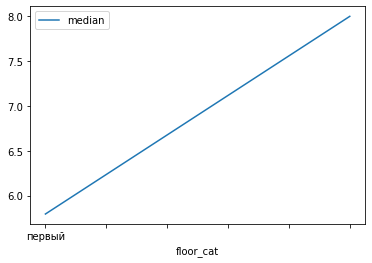

In [42]:
#Cоставим сводную таблицу и график по стоимости квадратного метра от этажа.
spb_centr_floor = spb_centr.query('floor_cat != "другой"').pivot_table(index = 'floor_cat', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_centr_floor.columns = ['mean', 'count', 'median']
spb_centr_floor.plot(y = 'median')
spb_centr_floor


**Вывод:**
Никаких особенностей и отличий от основного исследования не видно.

<AxesSubplot:xlabel='year'>

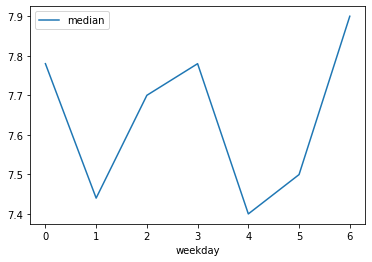

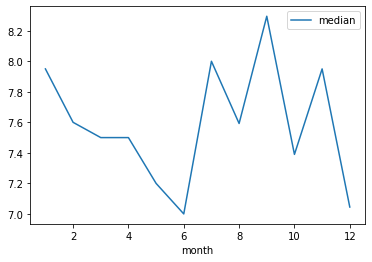

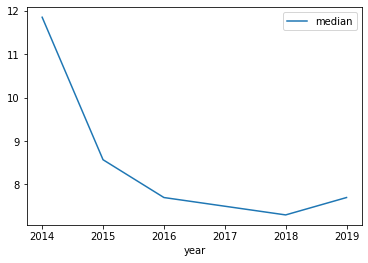

In [43]:
#Cоставим сводную таблицу и график по стоимости квадратного метра от дня недели размещения
spb_centr_weekday = spb_centr.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_centr_weekday.columns = ['mean', 'count', 'median']
spb_centr_weekday.plot(y = 'median')

#Cоставим сводную таблицу и график по стоимости квадратного метра от месяца размещения
spb_centr_month = spb_centr.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_centr_month.columns = ['mean', 'count', 'median']
spb_centr_month.plot(y = 'median')


#Cоставим сводную таблицу и график по стоимости квадратного метра от года размещения
spb_centr_year = spb_centr.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_centr_year.columns = ['mean', 'count', 'median']
spb_centr_year.plot(y = 'median')

**Вывод:**
- В отличии от анализа всего графика тут минимальные цены во понедельник и среду, самые высокие в выходные 
- В месяцах и годах ситуация в центре не отличается от общей картины

0.05794691687347738

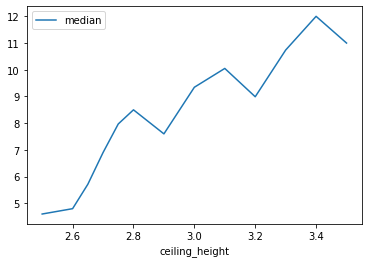

In [44]:
spb_centr_high = spb_centr.pivot_table(index = 'ceiling_height', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
spb_centr_high.columns = ['mean', 'count', 'median']
spb_centr_high.query('count > 50').plot(y = 'median')
spb_centr['ceiling_height'].corr(spb_centr['last_price'])

**Вывод:**
Квартиры с самыми высокими ценами за метр квадратный, в большинстве своем, имеют потолки от 2,75 до 3,5м метров.

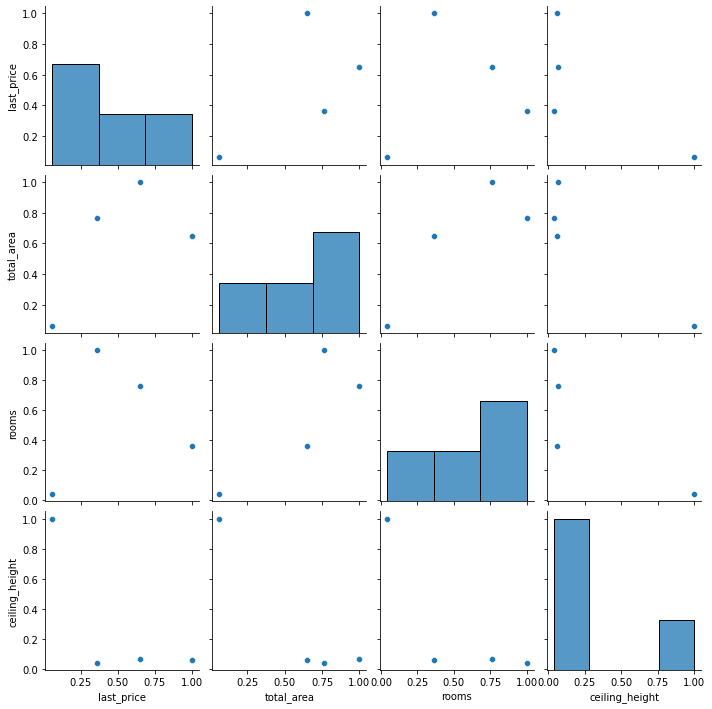

In [45]:
#Посмотрим корреляцию Пирсона по данным параметрам.
sns.pairplot(spb_centr[['last_price', 'total_area', 'rooms', 'ceiling_height']].corr())

## Общий вывод

Мы обработали полученные данные, заменили пропуски, заменили типы данных на необходимые для комфортного анализа. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир. Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах. Проведя обработку данных, мы обнаружили, что нормальные сроки продажи квартир от 1 до 600 дней. Мы выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. Нужно учитывать, что в 2016-2017 годах стоимость квартир в среднем по рынку была ниже на 10-20 %. Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 10 километров.

Для определения рыночной стоимости объектов недвижимости важны следующие параметры:

- общая площадь квартиры
- расстояние до центра города (центр города огранчен окружностью радиусом 10 км)
- число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее, по крайне мере первый)

Средняя стоимость исходя из полученных и изученных данных, учитывая указанные факторы выше:
- по общей выборке около 6.5 млн рублей
- по выборке в радиусе 10 км от центра около 11 млн рублей

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод